# Mini project - Regression

## Business objective 

### Build a model to predict the Sales of a store


### The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city / country.

### To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.


# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
data=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


# Data understanding

In [3]:
data.columns           #columns of the data

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
data.size            #total number of observations

170448

In [5]:
data.shape        #rows and columns

(14204, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
data.describe().T        #summary of numerical data

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
data.describe(include='object').T          #summary of object data

,count,unique,top,freq
Item_Identifier,14204,1559,FDU15,10
Item_Fat_Content,14204,2,Low Fat,9185
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,14204,3,Small,7071
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


In [9]:
data.isna().sum()          #checking for null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### There are null values in the column Item_Outlet_Sales. We can predict the missing values of the column

In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### As we can see that few of the columns are in object datatype. But for ML model we need all numerical data, so we label encode all the object columns

# Label Encoding

In [11]:
label=LabelEncoder()

In [12]:
data['Item_Identifier_encode']=label.fit_transform(data.Item_Identifier)

In [13]:
data['Item_Fat_Content_encode']=label.fit_transform(data.Item_Fat_Content)

In [14]:
data['Item_Type_encode']=label.fit_transform(data.Item_Type)

In [15]:
data['Outlet_Identifier_encode']=label.fit_transform(data.Outlet_Identifier)

In [16]:
data['Outlet_Size_encode']=label.fit_transform(data.Outlet_Size)

In [17]:
data['Outlet_Location_Type_encode']=label.fit_transform(data.Outlet_Location_Type)

In [18]:
data['Outlet_Type_encode']=label.fit_transform(data.Outlet_Type)

In [19]:
data.dtypes

Item_Identifier                 object
Item_Weight                    float64
Item_Fat_Content                object
Item_Visibility                float64
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Establishment_Year        int64
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Identifier_encode           int32
Item_Fat_Content_encode          int32
Item_Type_encode                 int32
Outlet_Identifier_encode         int32
Outlet_Size_encode               int32
Outlet_Location_Type_encode      int32
Outlet_Type_encode               int32
dtype: object

# EDA

## Univarient

In [20]:
data.select_dtypes(['float64','int32','int64'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,9.30,0.016047,249.8092,1999,3735.1380,156,0,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,443.4228,8,1,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,662,0,10,9,1,0,1
3,19.20,0.074402,182.0950,1998,732.3800,1121,1,6,0,1,2,0
4,8.93,0.064299,53.8614,1987,994.7052,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,NaN,233,1,13,8,2,0,1
14200,7.60,0.142991,169.1448,2009,NaN,308,1,15,3,1,2,2
14201,10.00,0.073529,118.7440,2002,NaN,1426,0,8,7,2,1,1
14202,15.30,0.064709,214.6218,2007,NaN,521,1,3,2,2,1,1


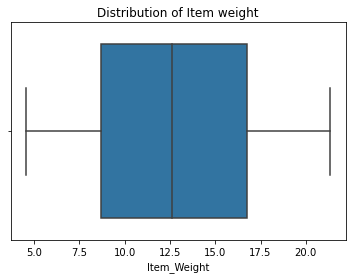

In [21]:
sns.boxplot(data.Item_Weight)
plt.title("Distribution of Item weight")
plt.show()

### Most of the items weight between 8 to 17 kgs

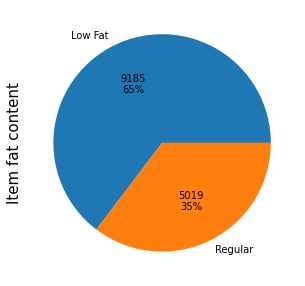

In [22]:
labels=data['Item_Fat_Content'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Item_Fat_Content']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Item fat content', size=15)
# show plot
plt.show()

### The items have 2 kinds of fat content : low fat and regular.
### 65% of the items are of low fat where as the other 35% are regular

In [23]:
data.Item_Visibility

0        0.016047
1        0.019278
2        0.016760
3        0.074402
4        0.064299
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.064709
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

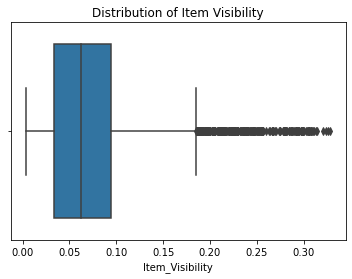

In [24]:
sns.boxplot(data.Item_Visibility)
plt.title("Distribution of Item Visibility")
plt.show()

### Most of the items are in the visibility range of 0.01 - 0.1. There are many outliers in this column

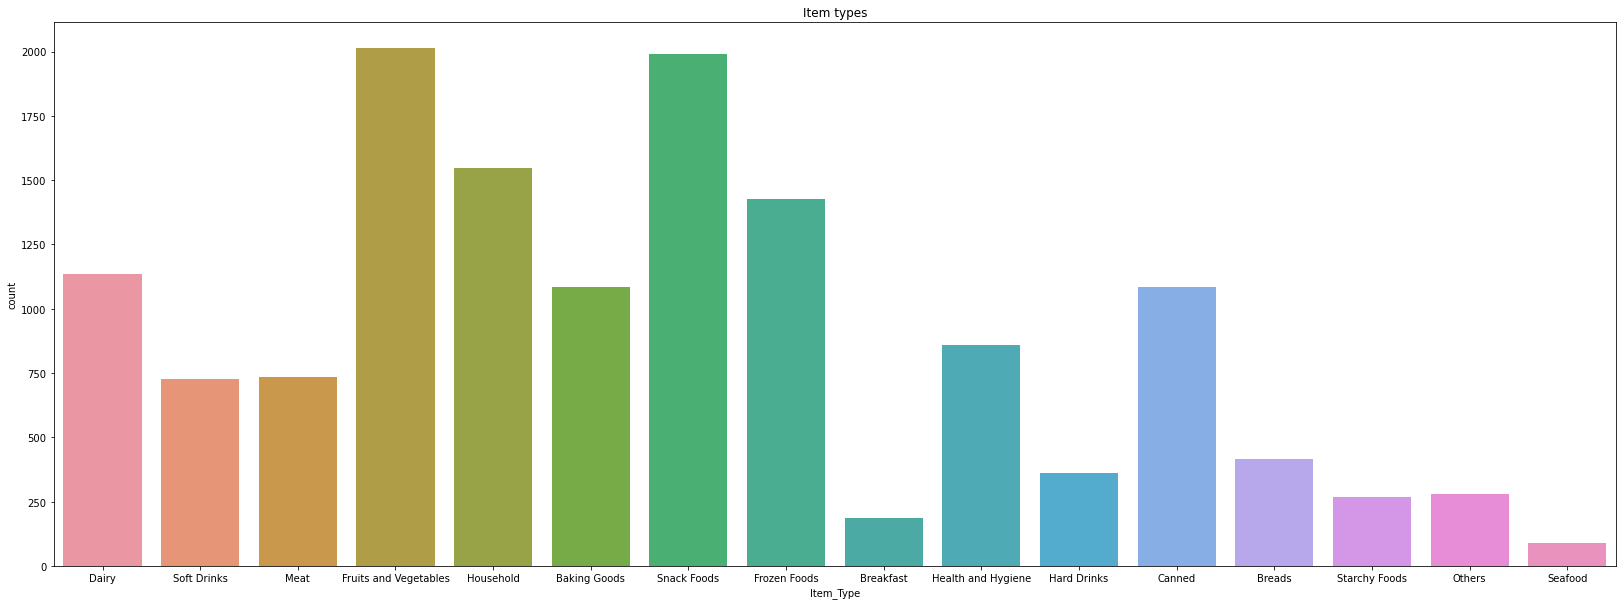

In [25]:
plt.figure(figsize=(28,10))
sns.countplot(data.Item_Type)
plt.title("Item types")
plt.show()

### We can see that there are 16 types of items. And the most popular ones are Fruits and vegetables and snacks foods.
### The least type of item is seafood

In [26]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_encode',
       'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Identifier_encode', 'Outlet_Size_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

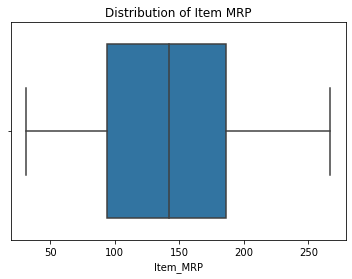

In [27]:
sns.boxplot(data.Item_MRP)
plt.title("Distribution of Item MRP")
plt.show()

### Most of the items are in the cost range of 90 - 190

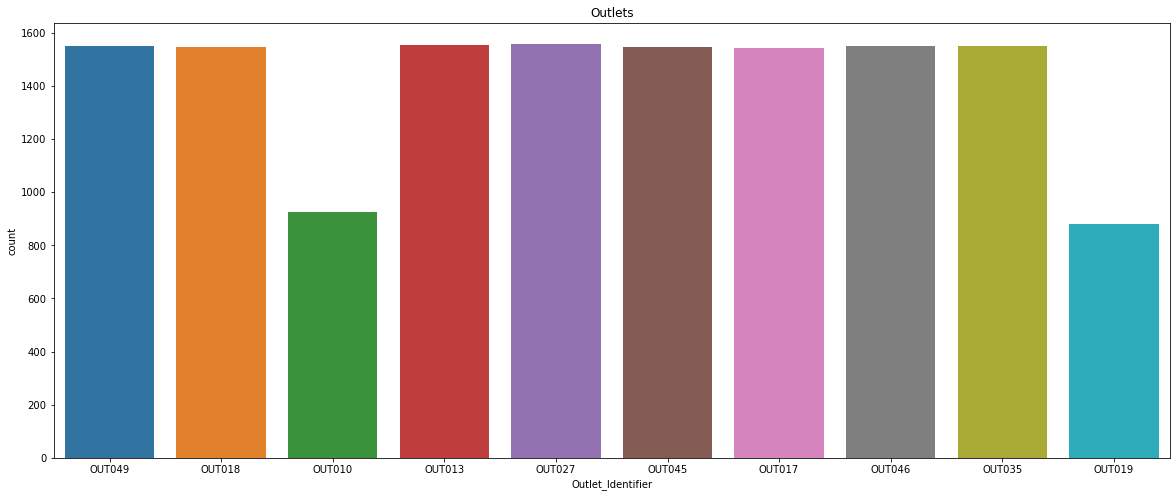

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(data.Outlet_Identifier)
plt.title("Outlets")
plt.show()

### There are 10 different types outlets. Most of the outlets have the same number of stores. OUT10 and OUT19 have the least number of stores

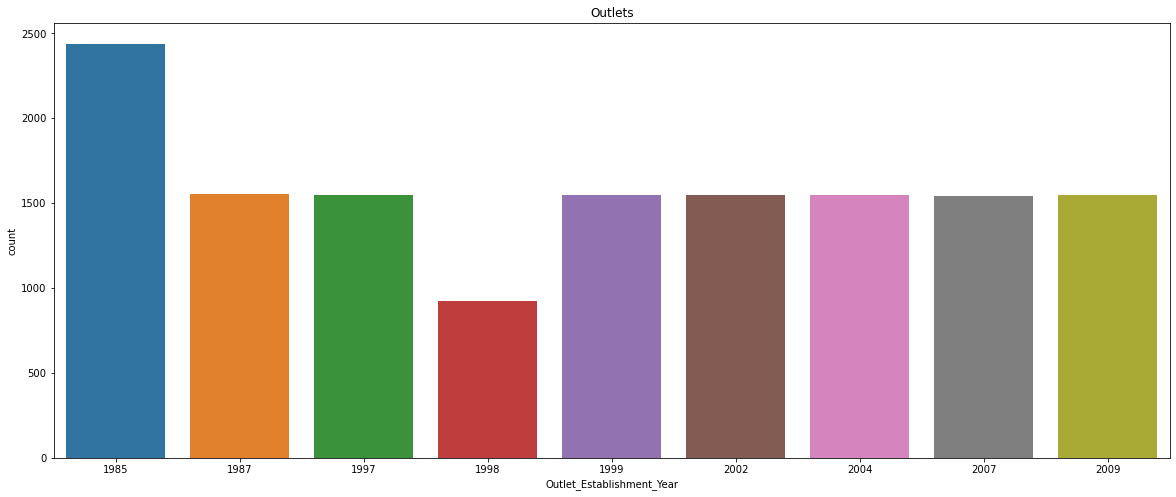

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data.Outlet_Establishment_Year)
plt.title("Outlets")
plt.show()

### Most number of outlets were established in the year 1985. After 1985 the number of outlets have been increasing constantly other than in the year 1998

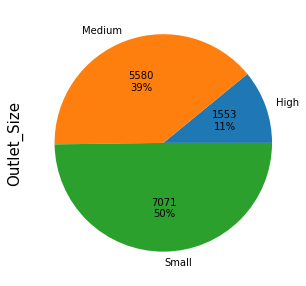

In [30]:
labels=data['Outlet_Size'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Outlet_Size']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Outlet_Size', size=15)
# show plot
plt.show()

### Most of the outlets are small in size(50%). High size outlets are the least(11%)

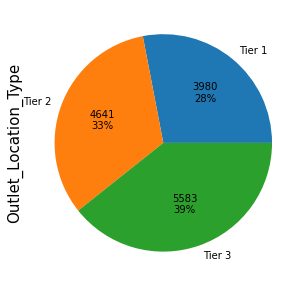

In [31]:
labels=data['Outlet_Location_Type'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Outlet_Location_Type']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Outlet_Location_Type', size=15)
# show plot
plt.show()

### The stores are almost equally spread across each location type. Tier 3 is just ahead with 39%

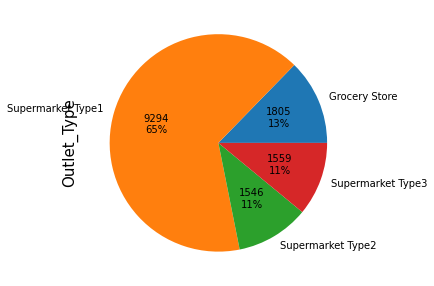

In [32]:
labels=data['Outlet_Type'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Outlet_Type']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Outlet_Type', size=15)
# show plot
plt.show()

### Most of the stores are of Supermart type 1. The other 3 types have almost the same number

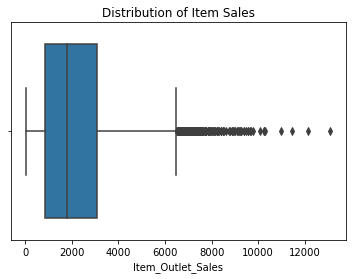

In [33]:
sns.boxplot(data.Item_Outlet_Sales)
plt.title("Distribution of Item Sales")
plt.show()

### The items sales mostly ranges between 1000 - 3000. There are many outliers in this column

# Bivarient Analysis

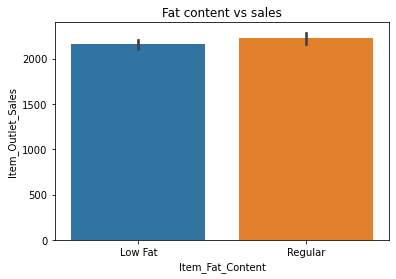

In [34]:
sns.barplot(data.Item_Fat_Content,data.Item_Outlet_Sales)
plt.title("Fat content vs sales")
plt.show()

### The sales of both low fat and regular items are almost the same

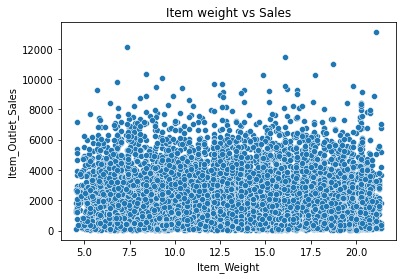

In [35]:
sns.scatterplot(data.Item_Weight,data.Item_Outlet_Sales)
plt.title("Item weight vs Sales")
plt.show()

### There is no particular trend for weight vs sales

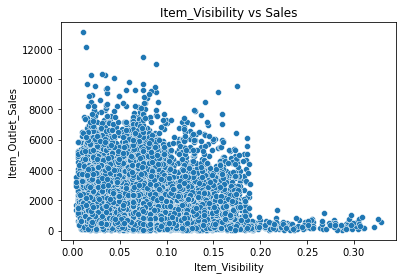

In [36]:
sns.scatterplot(data.Item_Visibility,data.Item_Outlet_Sales)
plt.title("Item_Visibility vs Sales")
plt.show()

### Here we can observe that the sales of items with low visibility is high compared to ones with high visibility items

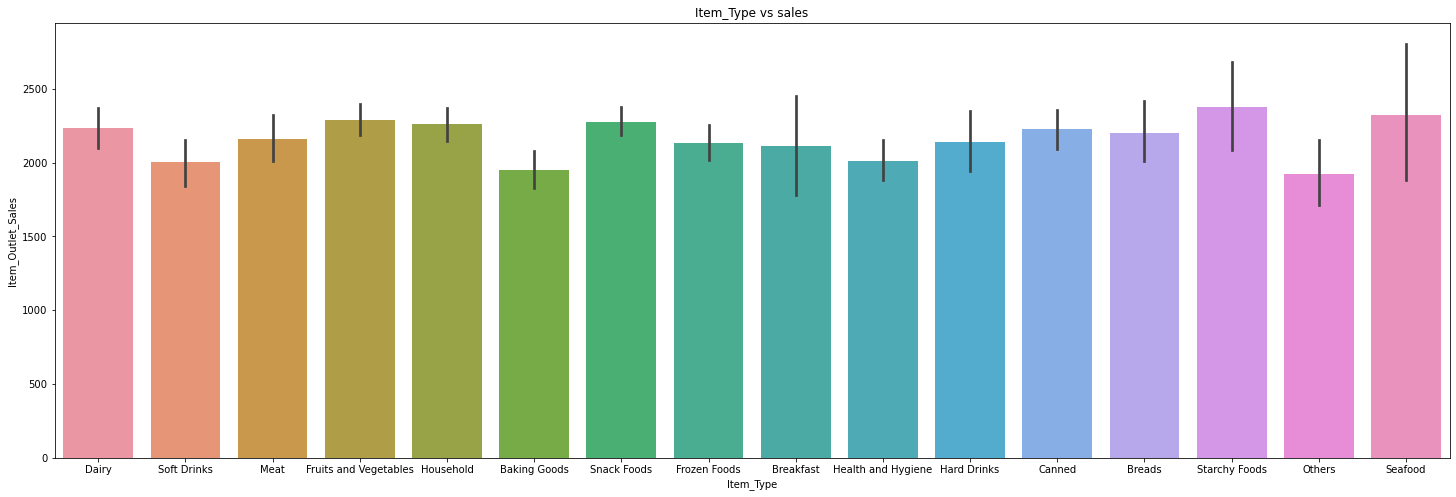

In [37]:
plt.figure(figsize=(25,8))
sns.barplot(data.Item_Type,data.Item_Outlet_Sales)
plt.title("Item_Type vs sales")
plt.show()

### Almost all the item types have the same amount of sales

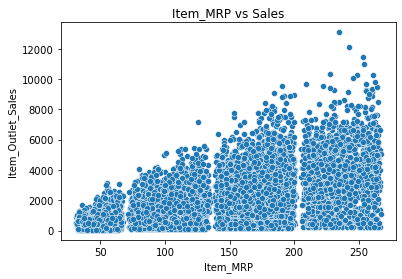

In [38]:
sns.scatterplot(data.Item_MRP,data.Item_Outlet_Sales)
plt.title("Item_MRP vs Sales")
plt.show()

### The sales of the items increases as the MRP of the item also increases

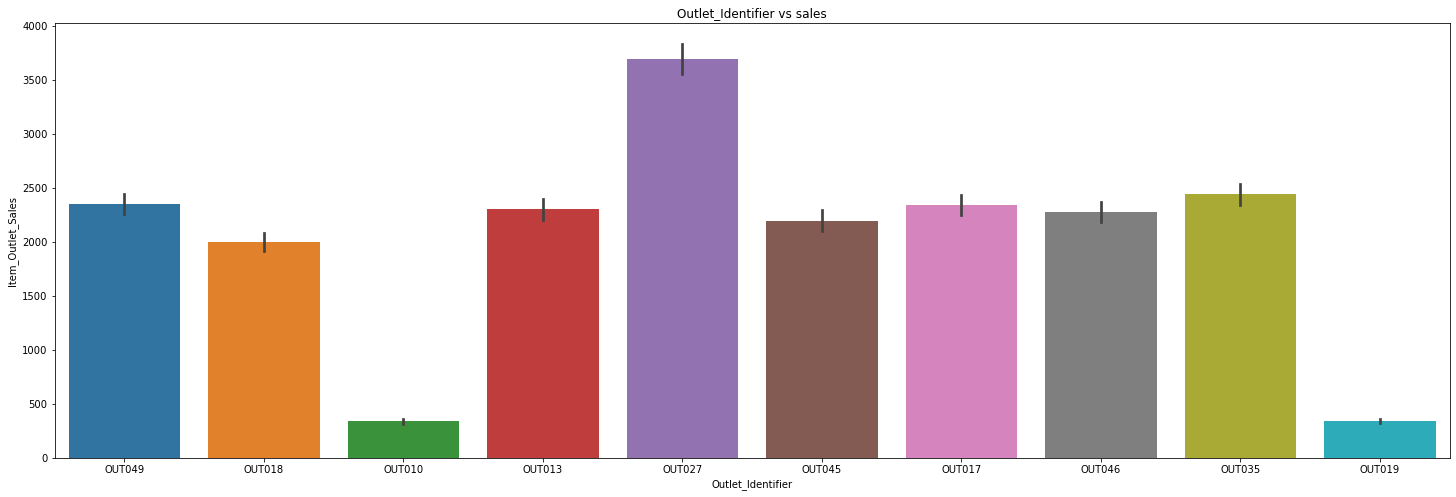

In [39]:
plt.figure(figsize=(25,8))
sns.barplot(data.Outlet_Identifier,data.Item_Outlet_Sales)
plt.title("Outlet_Identifier vs sales")
plt.show()

### The outlet 27 has the highest sales. Outlet 19 and 10 have the least sales

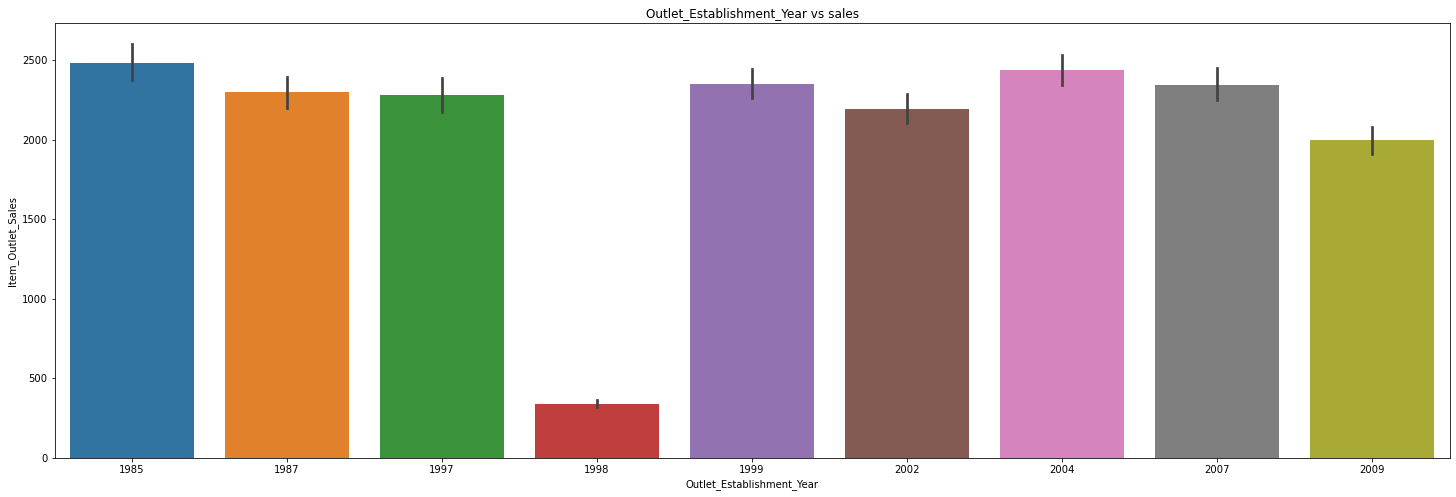

In [40]:
plt.figure(figsize=(25,8))
sns.barplot(data.Outlet_Establishment_Year,data.Item_Outlet_Sales)
plt.title("Outlet_Establishment_Year vs sales")
plt.show()

### The sales of all the stores established in each year is almost the same. But the stores established in 1998 produce the least sales

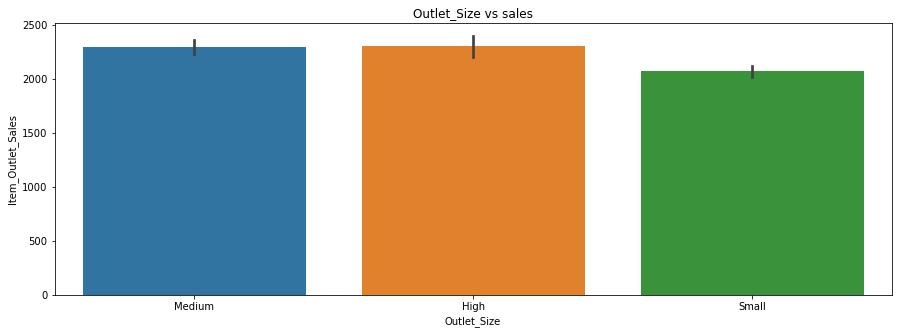

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data.Outlet_Size,data.Item_Outlet_Sales)
plt.title("Outlet_Size vs sales")
plt.show()

### Medium and High size outlets have the highest sales. Small size outlets have little less sales

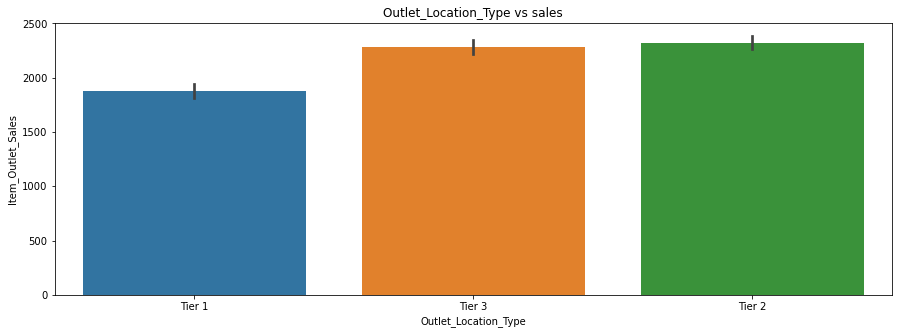

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data.Outlet_Location_Type,data.Item_Outlet_Sales)
plt.title("Outlet_Location_Type vs sales")
plt.show()

### The sales of stores in Tier 3 and Tier 2 is highest. Tier 1 has the least sales

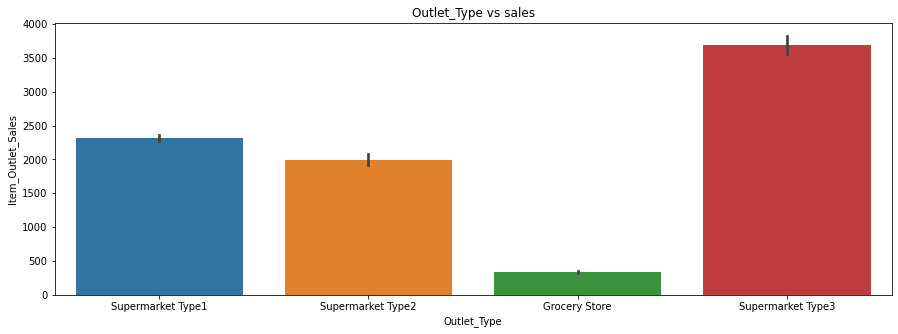

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data.Outlet_Type,data.Item_Outlet_Sales)
plt.title("Outlet_Type vs sales")
plt.show()

### Supermarkert type 3 has the highest sales whereas grocery store has the least sales

# Multivarient Analysis

In [44]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_encode',
       'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Identifier_encode', 'Outlet_Size_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

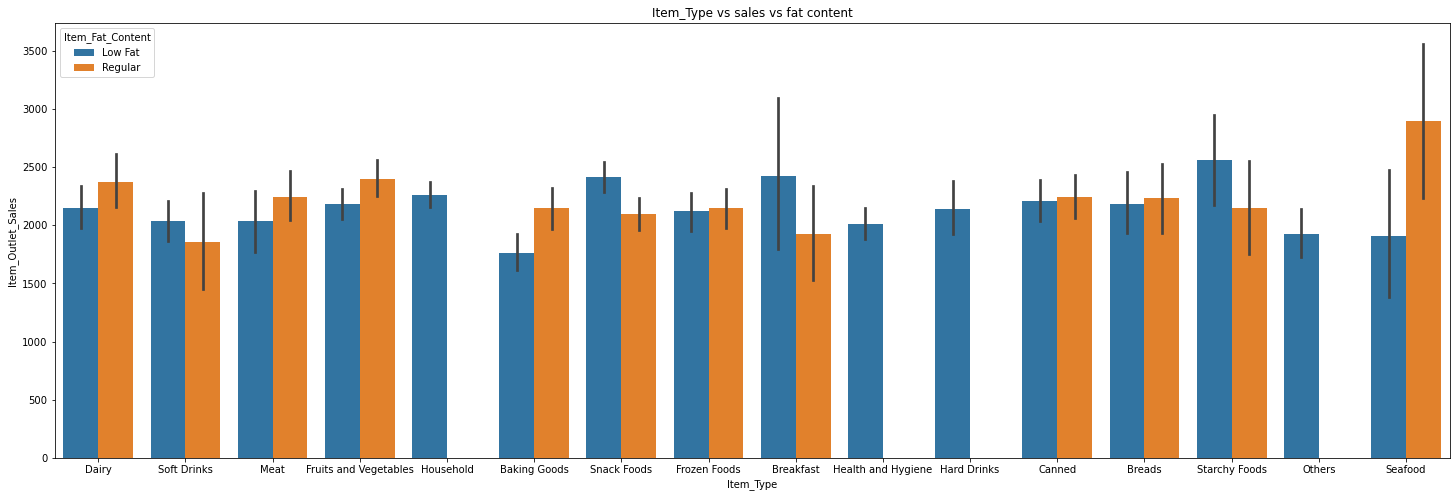

In [45]:
plt.figure(figsize=(25,8))
sns.barplot(data.Item_Type,data.Item_Outlet_Sales,hue=data.Item_Fat_Content)
plt.title("Item_Type vs sales vs fat content")
plt.show()

### All the items with regular and low fat content have almost the same sales

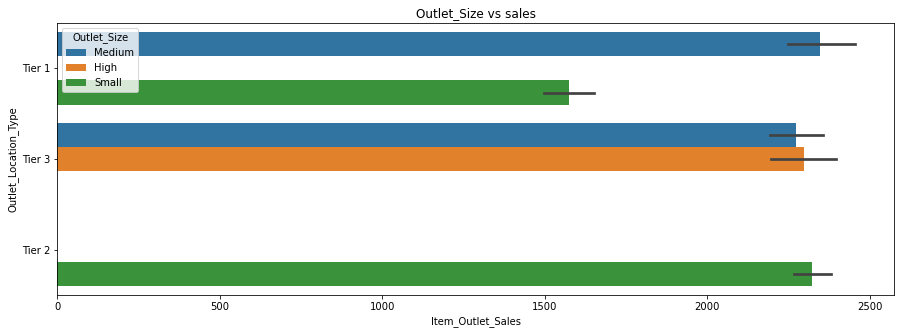

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(data.Item_Outlet_Sales,data.Outlet_Location_Type,hue=data.Outlet_Size)
plt.title("Outlet_Size vs sales")
plt.show()

### We can observe that Tier 1 does not have High size stores. Tier 3 does not have small size stores where are tier 2 has only small size stores

### Sales of Tier 1 small stores is the least

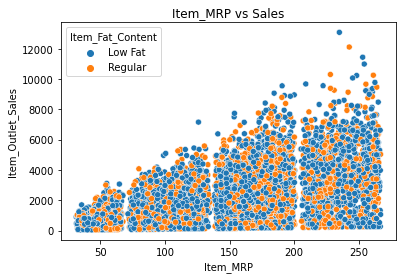

In [47]:
sns.scatterplot(data.Item_MRP,data.Item_Outlet_Sales,hue=data.Item_Fat_Content)
plt.title("Item_MRP vs Sales")
plt.show()

### We can see that the sales increase with increase in MRP but does not depend on the fat content

# Outlier treatment

### The columns sales and visibility have outliers so we have to treat them

In [48]:
#up_sales=data['Item_Outlet_Sales'].quantile(0.99)
up_visibility=data['Item_Visibility'].quantile(0.95)


In [49]:
data=data[(data['Item_Visibility']<=up_visibility)]
#data=data[(data['Item_Outlet_Sales']<=up_sales)]


In [50]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,233,1,13,8,2,0,1
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,308,1,15,3,1,2,2
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,1426,0,8,7,2,1,1
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,521,1,3,2,2,1,1


# Correlation

In [51]:
corr=data.corr()                #correlation with heatmap
corr.style.background_gradient(cmap='YlOrRd')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
Item_Weight,1.000000,-0.023300,0.032112,-0.000625,0.009570,0.052893,-0.031930,0.033934,0.001168,0.000996,-0.001394,-0.000583
Item_Visibility,-0.023300,1.000000,0.003277,-0.039062,-0.060275,-0.042605,0.062489,-0.043858,-0.046060,0.011328,-0.006671,-0.071138
Item_MRP,0.032112,0.003277,1.000000,-0.001569,0.579981,0.007550,-0.000319,0.034088,-0.002825,-0.000596,-0.000001,-0.003104
Outlet_Establishment_Year,-0.000625,-0.039062,-0.001569,1.000000,-0.073438,-0.005406,0.002976,0.002173,0.077232,0.455930,-0.120031,-0.158102
Item_Outlet_Sales,0.009570,-0.060275,0.579981,-0.073438,1.000000,-0.001295,0.023304,0.013300,0.140405,-0.057189,0.086805,0.376280
Item_Identifier_encode,0.052893,-0.042605,0.007550,-0.005406,-0.001295,1.000000,-0.116159,-0.009434,-0.004174,0.002386,-0.002106,-0.008070
Item_Fat_Content_encode,-0.031930,0.062489,-0.000319,0.002976,0.023304,-0.116159,1.000000,-0.144832,0.001823,-0.000716,0.001893,0.005001
Item_Type_encode,0.033934,-0.043858,0.034088,0.002173,0.013300,-0.009434,-0.144832,1.000000,-0.000918,-0.001255,0.002619,0.001974
Outlet_Identifier_encode,0.001168,-0.046060,-0.002825,0.077232,0.140405,-0.004174,0.001823,-0.000918,1.000000,0.425860,-0.725456,0.068212
Outlet_Size_encode,0.000996,0.011328,-0.000596,0.455930,-0.057189,0.002386,-0.000716,-0.001255,0.425860,1.000000,-0.582800,-0.262243


### Based on the correlation values of each column with the sales we select the features with the best correlation to obtain a good model to predict the correct sales

### Here we have selected the foloowing columns 'Item_Visibility','Item_MRP','Outlet_Identifier_encode','Outlet_Size_encode','Outlet_Location_Type_encode','Outlet_Type_encode'

In [52]:
d1=data[['Item_Outlet_Sales','Item_Visibility','Item_MRP','Outlet_Identifier_encode','Outlet_Size_encode','Outlet_Location_Type_encode','Outlet_Type_encode']]

In [53]:
d1.reset_index(inplace=True)

In [54]:
d1.drop(columns='index',inplace=True)

In [55]:
d1

,Item_Outlet_Sales,Item_Visibility,Item_MRP,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,3735.1380,0.016047,249.8092,9,1,0,1
1,443.4228,0.019278,48.2692,3,1,2,2
2,2097.2700,0.016760,141.6180,9,1,0,1
3,732.3800,0.074402,182.0950,0,1,2,0
4,994.7052,0.064299,53.8614,1,0,2,1
...,...,...,...,...,...,...,...
13488,NaN,0.013496,141.3154,8,2,0,1
13489,NaN,0.142991,169.1448,3,1,2,2
13490,NaN,0.073529,118.7440,7,2,1,1
13491,NaN,0.064709,214.6218,2,2,1,1


# Data scaling

In [56]:
scale=MinMaxScaler()

In [57]:
scaled_data=pd.DataFrame(scale.fit_transform(d1.drop(columns='Item_Outlet_Sales')),columns=d1.drop(columns='Item_Outlet_Sales').columns)

In [58]:
scaled_data

,Item_Visibility,Item_MRP,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.078120,0.927507,1.000000,0.5,0.0,0.333333
1,0.098357,0.072068,0.333333,0.5,1.0,0.666667
2,0.082585,0.468288,1.000000,0.5,0.0,0.333333
3,0.443619,0.640093,0.000000,0.5,1.0,0.000000
4,0.380338,0.095805,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...
13488,0.062144,0.467004,0.888889,1.0,0.0,0.333333
13489,0.873212,0.585126,0.333333,0.5,1.0,0.666667
13490,0.438146,0.371199,0.777778,1.0,0.5,0.333333
13491,0.382904,0.778154,0.222222,1.0,0.5,0.333333


## In this project we have labelled data and we have a dependent variable (Sales), so we perform supervised ML

## As our dependent variable sales is numerical, this falls under regression model

## Here we have to predict the sales

# Data splitting

In [59]:
d1.isnull().sum()

Item_Outlet_Sales              5401
Item_Visibility                   0
Item_MRP                          0
Outlet_Identifier_encode          0
Outlet_Size_encode                0
Outlet_Location_Type_encode       0
Outlet_Type_encode                0
dtype: int64

In [60]:
d1[d1['Item_Outlet_Sales'].isna()]

,Item_Outlet_Sales,Item_Visibility,Item_MRP,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
8092,NaN,0.007565,107.8622,9,1,0,1
8093,NaN,0.038428,87.3198,2,2,1,1
8094,NaN,0.099575,241.7538,0,1,2,0
8095,NaN,0.015388,155.0340,2,2,1,1
8096,NaN,0.118599,234.2300,5,1,2,3
...,...,...,...,...,...,...,...
13488,NaN,0.013496,141.3154,8,2,0,1
13489,NaN,0.142991,169.1448,3,1,2,2
13490,NaN,0.073529,118.7440,7,2,1,1
13491,NaN,0.064709,214.6218,2,2,1,1


## As we can from index 8092 we have null values for Sales, we can consider these null columns as test data

In [61]:
y=d1.Item_Outlet_Sales         #dependent variable
x=scaled_data

In [62]:
x_train=x[:8092]       #splitting x
x_test=x[8092:]

In [63]:
y_train=y[:8092]          #splitting y
y_test=y[8092:]

# ML model

## Linear regression

In [64]:
lr_model=LinearRegression()      #defining model

In [65]:
lr_model=lr_model.fit(x_train,y_train)    #training model

In [66]:
lr_predict=lr_model.predict(x_test)

In [67]:
lr_score=lr_model.score(x_train,y_train)

In [68]:
print("The score of Linear Regression model is :",lr_score)

The score of Linear Regression model is : 0.494640409090769


# Decision tree

In [69]:
dt_model=DecisionTreeRegressor()

In [70]:
dt_model=dt_model.fit(x_train,y_train)

In [71]:
dt_score=dt_model.score(x_train,y_train)

In [72]:
dt_predict=dt_model.predict(x_test)

In [73]:
print("The score of Decision tree model is :",dt_score)

The score of Decision tree model is : 1.0


# Random Forest

In [74]:
rm_model=RandomForestRegressor()

In [75]:
rm_model=rm_model.fit(x_train,y_train)

In [76]:
rm_score=rm_model.score(x_train,y_train)

In [77]:
print("The score of Random forest model is :",rm_score)

The score of Random forest model is : 0.9344430995507319


# AdaBoosting

In [78]:
ada_model=AdaBoostRegressor()

In [79]:
ada_model=ada_model.fit(x_train,y_train)

In [80]:
ada_score=ada_model.score(x_train,y_train)

In [81]:
print("The score of AdaBoosting model is :",ada_score)

The score of AdaBoosting model is : 0.515390898311101


# Stacking

In [82]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('dtree', DecisionTreeRegressor()))
	level0.append(('forest', RandomForestRegressor()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

In [83]:
stack_model=get_stacking()

In [84]:
stack_model.fit(x_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('dtree', DecisionTreeRegressor()),
                              ('forest', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [85]:
stack=stack_model.score(x_train,y_train)

In [86]:
print("The score of Stacking model is :",stack)

The score of Stacking model is : 0.901397901740982


In [87]:
score={'Linear regression':lr_score,'Random forest':rm_score,'AdaBoosting':ada_score,'Stacking':stack}

In [88]:
name=list(score.keys())
values=list(score.values())

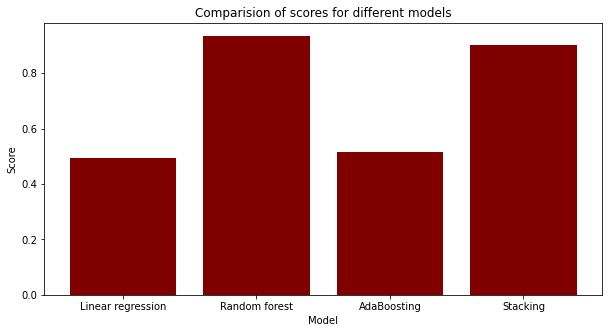

In [89]:
plt.figure(figsize=(10,5))
plt.bar(name,values,color='maroon')
plt.title("Comparision of scores for different models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()

## From the above graph we can see that the Random forest has the best score 

## So the best model for this project is Random forest

# BEST MODEL : Random Forest

In [90]:
rm_model=RandomForestRegressor()

In [91]:
rm_model=rm_model.fit(x_train,y_train)

In [92]:
rm_score=rm_model.score(x_train,y_train)

In [93]:
print("The score of Random forest model is :",rm_score)

The score of Random forest model is : 0.9345544084173356


In [94]:
predict=rm_model.predict(x_test)#predicted sales

In [95]:
predict

array([1667.29636 , 1190.210712,  482.50526 , ..., 1784.530424,
       3829.461886, 1759.396474])

In [96]:
predict.size

5401

In [97]:
predicted_sales=pd.DataFrame(predict,columns=['predicted_sales'])

In [98]:
predicted_sales

,predicted_sales
0,1667.296360
1,1190.210712
2,482.505260
3,2292.575772
4,6104.047742
...,...
5396,2282.162660
5397,2316.704364
5398,1784.530424
5399,3829.461886


In [115]:
ss=d1.Item_Outlet_Sales.dropna()

In [118]:
a=ss.append(predicted_sales['predicted_sales'])

In [127]:
b=pd.DataFrame(a,columns=['Sales with prediction'])

In [132]:
b.reset_index(inplace=True)

In [134]:
b.drop(columns="index",inplace=True)

In [135]:
b

,Sales with prediction
0,3735.138000
1,443.422800
2,2097.270000
3,732.380000
4,994.705200
...,...
13488,2282.162660
13489,2316.704364
13490,1784.530424
13491,3829.461886


In [139]:
d1=pd.concat([d1,b],axis=1)

In [140]:
d1

,Item_Outlet_Sales,Item_Visibility,Item_MRP,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode,Sales with prediction
0,3735.1380,0.016047,249.8092,9,1,0,1,3735.138000
1,443.4228,0.019278,48.2692,3,1,2,2,443.422800
2,2097.2700,0.016760,141.6180,9,1,0,1,2097.270000
3,732.3800,0.074402,182.0950,0,1,2,0,732.380000
4,994.7052,0.064299,53.8614,1,0,2,1,994.705200
...,...,...,...,...,...,...,...,...
13488,NaN,0.013496,141.3154,8,2,0,1,2282.162660
13489,NaN,0.142991,169.1448,3,1,2,2,2316.704364
13490,NaN,0.073529,118.7440,7,2,1,1,1784.530424
13491,NaN,0.064709,214.6218,2,2,1,1,3829.461886



### Here i have appended the predicted values in to the dataframe with the old sales values. This is the final dataframe
### The null values are given with the corresponding predicted values

In [142]:
d1[['Item_Outlet_Sales','Sales with prediction']]

,Item_Outlet_Sales,Sales with prediction
0,3735.1380,3735.138000
1,443.4228,443.422800
2,2097.2700,2097.270000
3,732.3800,732.380000
4,994.7052,994.705200
...,...,...
13488,NaN,2282.162660
13489,NaN,2316.704364
13490,NaN,1784.530424
13491,NaN,3829.461886


## Insights

Most of the items weight between 8 to 17 kgs  
The items have 2 kinds of fat content : low fat and regular.  
65% of the items are of low fat where as the other 35% are regular  
Most of the items are in the visibility range of 0.01 - 0.1  
We can see that there are 16 types of items. And the most popular ones are Fruits and vegetables and snacks foods.  
The least type of item is seafood  
Most of the items are in the cost range of 90 - 190   
There are 10 different types outlets. Most of the outlets have the same number of stores. OUT10 and OUT19 have the least number of stores  
Most number of outlets were established in the year 1985. After 1985 the number of outlets have been increasing constantly other than in the year 1998  
Most of the outlets are small in size(50%). High size outlets are the least(11%)  
The stores are almost equally spread across each location type. Tier 3 is just ahead with 39%  
Most of the stores are of Supermart type 1. The other 3 types have almost the same number  
The items sales mostly ranges between 1000 - 3000  
The sales of both low fat and regular items are almost the same  
There is no particular trend for weight vs sales  
Here we can observe that the sales of items with low visibility is high compared to ones with high visibility items  
Almost all the item types have the same amount of sales  
The sales of the items increases as the MRP of the item also increases  
The sales of all the stores established in each year is almost the same. But the stores established in 1998 produce the least sales  
The outlet 27 has the highest sales. Outlet 19 and 10 have the least sales  
The sales of stores in Tier 3 and Tier 2 is highest. Tier 1 has the least sales  
Supermarkert type 3 has the highest sales whereas grocery store has the least sales    
All the items with regular and low fat content have almost the same sales  
We can observe that Tier 1 does not have High size stores. Tier 3 does not have small size stores where are tier 2 has only small size stores  
Sales of Tier 1 small stores is the least    
We can see that the sales increase with increase in MRP but does not depend on the fat content  
